In [8]:
import cv2
import os
import yolo_net

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import common
import numpy as np

# Initialize YoloNet 

In [2]:
model_folder = "pb/" #change folder where .pb and .meta files are located
model_name   = "yolo_fruits" #change name of your model

In [3]:
options = {"threshold": 0.15} #set options according to darkflow API

In [4]:
net = yolo_net.create_net(model_name, model_folder, options)


Loading from .pb and .meta
Running entirely on CPU


# Test with webcamera

In [5]:
camera_id = 0 #change camera id to use another cameras

In [6]:
def release(camera):
    if camera is not None:
        camera.release()
        cv2.destroyAllWindows()

camera = cv2.VideoCapture(camera_id)
    
count, keyframe = 0, 3
boxes = []
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = camera.read()
        if ret == False:
            continue
   
        
        if (count  >= keyframe):
            boxes = net.detect(frame)
            count = 0
            
        frame = net.draw_detections(frame, boxes)       
        
        cv2.imshow('Frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break       
                
        count += 1
            
except KeyboardInterrupt:
    release(camera)
finally:
    release(camera)
release(camera)

# Test with Image

In [25]:
image_filename = 'data/images/apple/n07739125_12.jpg'

In [26]:
image = cv2.imread(image_filename, -1)

In [27]:
boxes = net.detect(image)
image = net.draw_detections(image, boxes)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

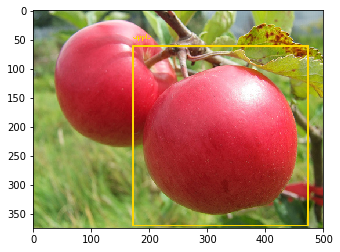

In [28]:
plt.imshow(image)
plt.show()